In [1]:
## This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/model-architecture/model_architecture.py
/kaggle/input/pic-for-test/1_D0ms2ujp1SNyMQg7kSg6cw.png
/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
import importlib
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import listdir
import time    
%matplotlib inline
from tensorflow.keras.callbacks import ModelCheckpoint

2024-03-30 12:20:08.609314: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-30 12:20:08.609369: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-30 12:20:08.610853: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# load data

In [3]:
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
train.head()

print("train shape: ",train.shape)
print("test shape: ",test.shape)

train shape:  (42000, 785)
test shape:  (28000, 784)


In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
label=train["label"]

In [7]:
label.value_counts().sort_index()

label
0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: count, dtype: int64

# data splitting

In [8]:
X = train.drop(columns="label")
y = train["label"]
X_test = test
print("x_train shape: ", X.shape)
print("y_train shape: ", y.shape)
print("x_test shape: ", X_test.shape)

x_train shape:  (42000, 784)
y_train shape:  (42000,)
x_test shape:  (28000, 784)


In [9]:

# Assuming you have X and y defined already

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)


X_train shape: (33600, 784)
X_val shape: (8400, 784)
y_train shape: (33600,)
y_val shape: (8400,)


# data_preprocessing

In [10]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Assuming you have X_train, X_val, y_train, and y_val defined as Pandas DataFrames

# Transform X_train, X_val, y_train, and y_val to NumPy arrays using iloc
X_train = X_train.to_numpy()
X_val = X_val.to_numpy()
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()

# Normalize pixel values
X_train = X_train / 255.0
X_val = X_val / 255.0

# One-hot encoding for y_train and y_val
num_classes = len(np.unique(y_train))  # Determine the number of classes
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)

# Reshape images
# Assuming images are grayscale and have shape (28, 28)
X_train = X_train.reshape(-1, 28, 28, 1)  # For grayscale images
X_val = X_val.reshape(-1, 28, 28, 1)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

X_train shape: (33600, 28, 28, 1)
X_val shape: (8400, 28, 28, 1)
y_train shape: (33600, 10)
y_val shape: (8400, 10)


In [21]:
test = X_test.to_numpy()
X_test = test / 255.0
X_test = X_test.reshape(-1, 28, 28, 1)  # For grayscale images
print("X_train shape:", X_train.shape)

X_train shape: (33600, 28, 28, 1)


### data visualization

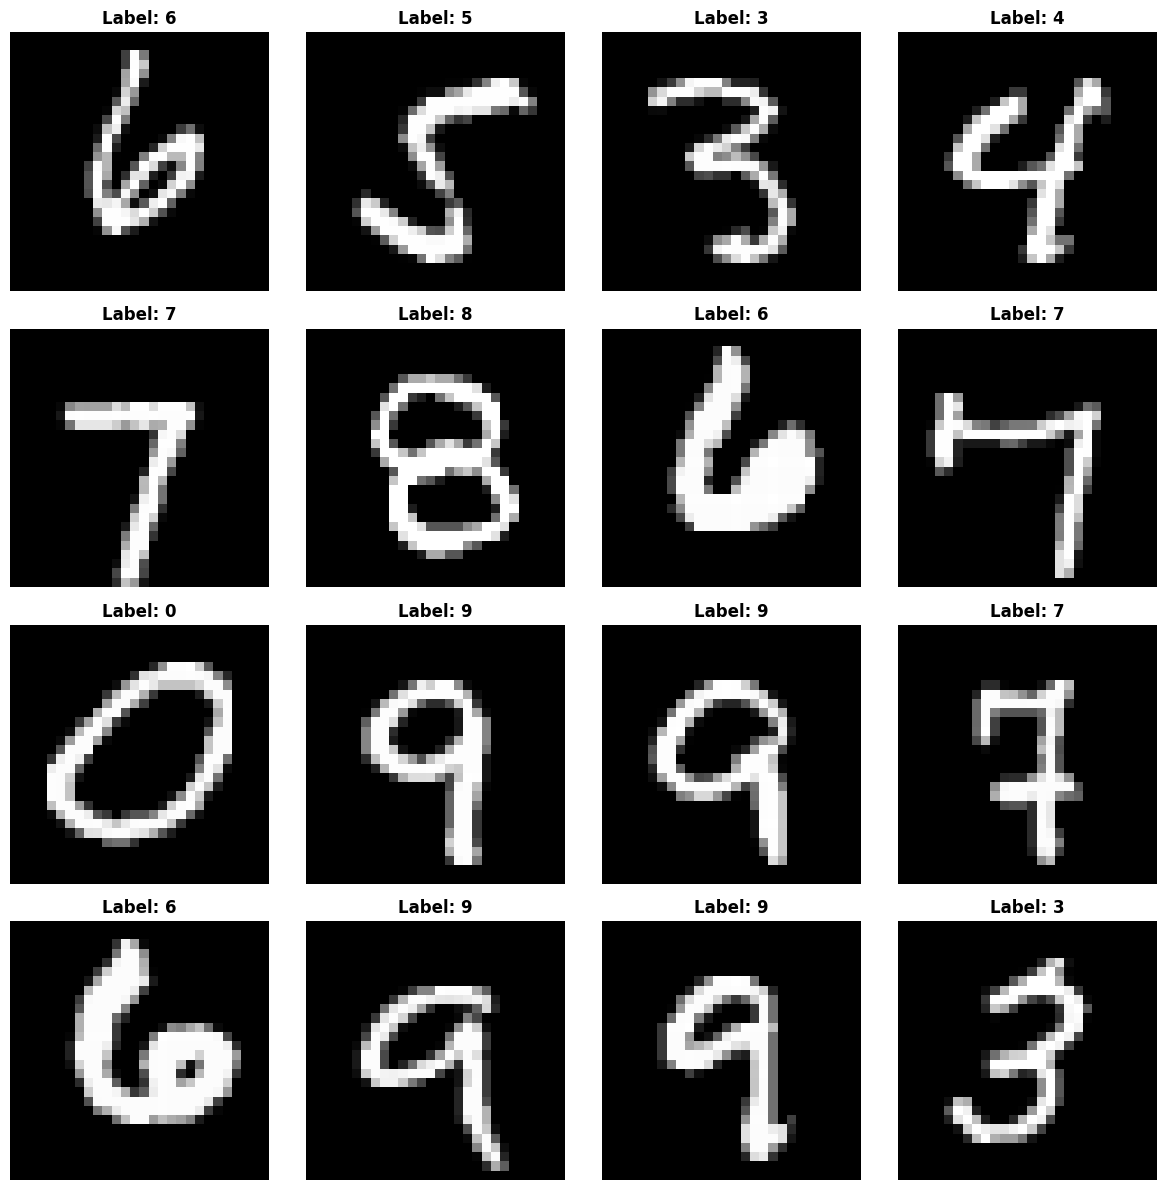

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have X_train, X_val, y_train, and y_val defined and preprocessed

# Example plot for the first sample
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape(28, 28), cmap='gray')  # Assuming images are grayscale
    label_index = np.argmax(y_train[i])  # Extract the index of the maximum value
    ax.set_title(f'Label: {label_index}', fontweight="bold")  # Set the title with the label index
    ax.axis('off')

plt.tight_layout()
plt.show()


# building architecture

In [12]:
#Defining the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape=(28,28,1)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  #tf.keras.layers.Dropout(0.50),
  tf.keras.layers.Dropout(0.50),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 6, 6, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,026 (804.79 KB)

 Trainable params: 206,026 (804.79 KB)

 Non-trainable params: 0 (0.00 B)

### training the model

In [15]:
checkpoint_callback = ModelCheckpoint('/kaggle/working/model_checkpoint_youssef.keras',
                                      monitor='val_loss',  # Save based on validation loss
                                      save_best_only=True,  # Save only the best model
                                      verbose=1)

In [17]:
#Compiling and model training with batch size = 64, epochs = 100, and optimizer = adam
Optimizer = tf.keras.optimizers.Adam(
            learning_rate=0.0005, 
            beta_1=0.9, 
            beta_2=0.999, 
            epsilon=1e-07,
            name='Adam'
)
model.compile(optimizer=Optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=X_train, y=y_train, batch_size=32, epochs=10, 
          validation_data=(X_val, y_val), callbacks=[checkpoint_callback])

Epoch 1/10


2024-03-30 12:21:53.139216: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 2.35363, expected 1.53764
2024-03-30 12:21:53.139260: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 1.82107, expected 1.00508
2024-03-30 12:21:53.139275: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 1.81936, expected 1.00338
2024-03-30 12:21:53.139283: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 2.23827, expected 1.42229
2024-03-30 12:21:53.139291: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 3.05481, expected 2.23883
2024-03-30 12:21:53.139299: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 2.58554, expected 1.76955
2024-03-30 12:21:53.139306: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 3.00002, expected 2.18403
2024-03-30 12:21:53.139313: E external/local_xla/xla/se

  61/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1957 - loss: 2.2354

I0000 00:00:1711801316.627574    1864 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1044/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7150 - loss: 0.8362

2024-03-30 12:22:00.165543: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 1.34972, expected 1.00161
2024-03-30 12:22:00.165594: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 1.6774, expected 1.32929
2024-03-30 12:22:00.165603: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 1.95868, expected 1.61057
2024-03-30 12:22:00.165611: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 1.69333, expected 1.34521
2024-03-30 12:22:00.165618: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 2.08558, expected 1.73747
2024-03-30 12:22:00.165625: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 1.59326, expected 1.24515
2024-03-30 12:22:00.165633: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 1.72639, expected 1.37827
2024-03-30 12:22:00.165640: E external/local_xla/xla/ser


Epoch 1: val_loss improved from inf to 0.08388, saving model to /kaggle/working/model_checkpoint_youssef.keras
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7161 - loss: 0.8333 - val_accuracy: 0.9743 - val_loss: 0.0839
Epoch 2/10
1043/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9614 - loss: 0.1256
Epoch 2: val_loss improved from 0.08388 to 0.05374, saving model to /kaggle/working/model_checkpoint_youssef.keras
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9614 - loss: 0.1256 - val_accuracy: 0.9838 - val_loss: 0.0537
Epoch 3/10
1040/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9715 - loss: 0.0880
Epoch 3: val_loss improved from 0.05374 to 0.04487, saving model to /kaggle/working/model_checkpoint_youssef.keras
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9715 - loss: 0.0880 - val_accuracy: 0.9861 - val_loss: 0.0449
Epoch 4/10
1038/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9766 - loss: 0.0739
Epoch 4: val_loss did not improve fr

# load the model to test it 

In [37]:
model = load_model('/kaggle/working/model_checkpoint_youssef.keras')

In [22]:
results = model.predict(X_test)

# Select the index with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [23]:
print(results)

0        2
1        0
2        9
3        9
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64


In [24]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("youssef_submission.csv",index=False)

In [ ]:
submission = pd.read_csv('/kaggle/working/submission.csv')
print(submission.head())
print(submission.info())

# test the model on extranl photo

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


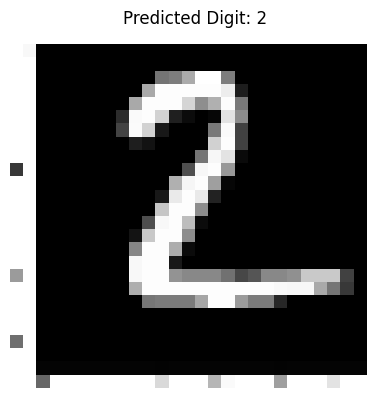

Predicted Digit: 2


In [19]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Load your trained model
model = load_model('/kaggle/working/model_checkpoint_youssef.keras')

# Load and preprocess the new image
img_path = '/kaggle/input/pic-for-test/1_D0ms2ujp1SNyMQg7kSg6cw.png'
img = load_img(img_path, color_mode='grayscale', target_size=(28, 28))
img_array = img_to_array(img)
img_array = img_array.astype('float32') / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Make sure the image shape matches your model's input shape
assert img_array.shape == (1, 28, 28, 1), "Image shape mismatch"

# Make predictions
predictions = model.predict(img_array)
predicted_digit = np.argmax(predictions)

# Display the image and predicted digit
plt.imshow(img, cmap='gray')
plt.title(f'Predicted Digit: {predicted_digit}')
plt.axis('off')
plt.show()

print("Predicted Digit:", predicted_digit)
